# Figure 1 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, exposure, color

In [2]:
def show_both(original, modified, bw=False):
    '''
    show two images side by side
    '''
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.gca().set_title('original')
    plt.imshow(original)
    
    plt.subplot(122)
    plt.gca().set_title('modified')
    
    if bw:
        plt.imshow(modified, cmap=plt.cm.gray)
    else:
        plt.imshow(modified)
        
    plt.show()

## Figure 1a: Monoculture vs co-culture

### _S. enterica_ lawn

In [3]:
# Read images

# sen - red
img_sen_r = plt.imread('data/raw/20211028_131646_SenRP4_mCher.jpg')
# sen - green
img_sen_g = plt.imread('data/raw/20211028_131632_SenRP4_GFP.jpg')

In [4]:
# Original merge

# make matrix of the right size
sen_merged = np.zeros(img_sen_r.shape)

# extract RED [0] channel
sen_merged[:,:,0] = img_sen_r[:,:,0]

# extract GREEN [1] channel
sen_merged[:,:,1] = img_sen_g[:,:,1]

In [5]:
# Adjusted merge

# make matrix of the right size
sen_adjusted = np.zeros(img_sen_r.shape)

# adjust RED [0] with histogram stretching
sen_adjusted[:,:,0] = exposure.rescale_intensity(img_sen_r[:,:,0], 
                                                 in_range=(49, 228))

# extract GREEN [1] channel, map to BLUE [2] (this is almost empty)
sen_adjusted[:,:,2] = img_sen_g[:,:,1]

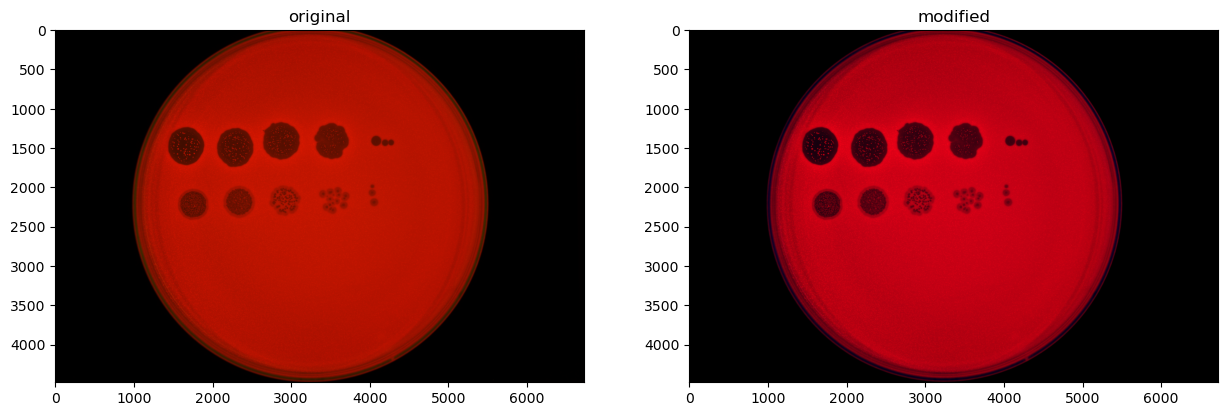

In [6]:
show_both(sen_merged.astype(np.uint8), 
          sen_adjusted.astype(np.uint8))

### _P. putida_ lawn

In [7]:
# Read images

# ppu - red
img_ppu_r = plt.imread('data/raw/20211028_131541_PpuRP4_mCher.jpg')
# ppu - green
img_ppu_g = plt.imread('data/raw/20211028_131541_PpuRP4_GFP.jpg')

In [8]:
# Original merge

# make matrix of the right size
ppu_merged = np.zeros(img_ppu_r.shape)

# extract RED [0] channel
ppu_merged[:,:,0] = img_ppu_r[:,:,0]

# extract GREEN [1]
ppu_merged[:,:,1] = img_ppu_g[:,:,1]

In [9]:
# Adjusted merge

# make matrix of the right size
ppu_adjusted = np.zeros(img_ppu_r.shape)

# adjust GREEN [1] channel with histogram stretching, map to BLUE [2]
ppu_adjusted[:,:,2] = exposure.rescale_intensity(img_ppu_g[:,:,1], 
                                                 in_range=(146, 214))

# extract RED [0] channel (this is almost empty)
ppu_adjusted[:,:,0] = img_ppu_r[:,:,0]

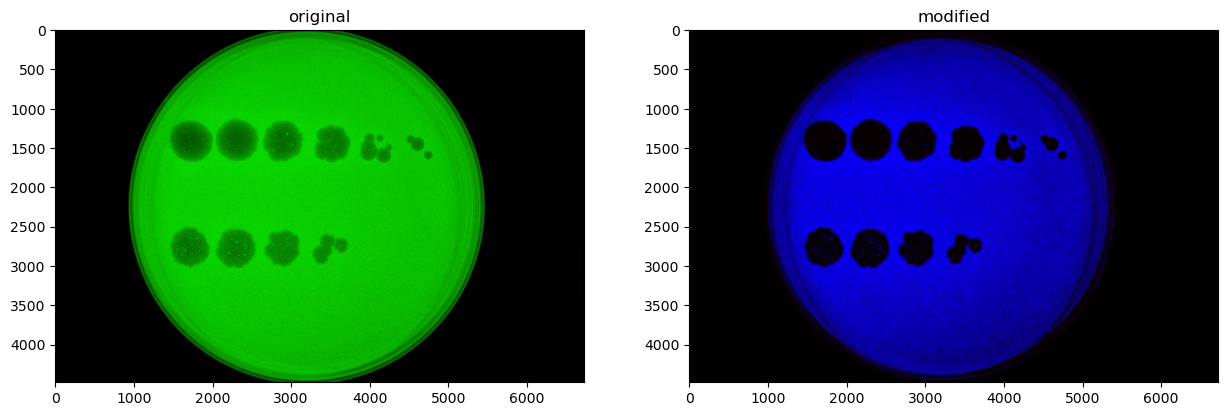

In [10]:
show_both(ppu_merged.astype(np.uint8), 
          ppu_adjusted.astype(np.uint8))

### Co-cultured lawn

In [11]:
# Read images

# co - red
img_co_r = plt.imread('data/raw/20211028_131427_SenPpu_mCher.jpg')
# co - green
img_co_g = plt.imread('data/raw/20211028_131427_SenPpu_GFP.jpg')

In [12]:
# Original merge

# make matrix of the right size
co_merged = np.zeros(img_co_r.shape)

# extract RED [0] from red picture
co_merged[:,:,0] = img_co_r[:,:,0]

# extract GREEN [1] from green picture
co_merged[:,:,1] = img_co_g[:,:,1]

In [13]:
# Adjusted merge

# make matrix of the right size
co_adjusted = np.zeros(img_co_r.shape)

# adjust RED [0] with histogram stretching
co_adjusted[:,:,0] = exposure.rescale_intensity(img_co_r[:,:,0], 
                                                in_range=(49, 228))

# adjust GREEN [1] channel with histogram stretching, map to BLUE [2]
co_adjusted[:,:,2] = exposure.rescale_intensity(img_co_g[:,:,1],
                                                in_range=(49, 158))

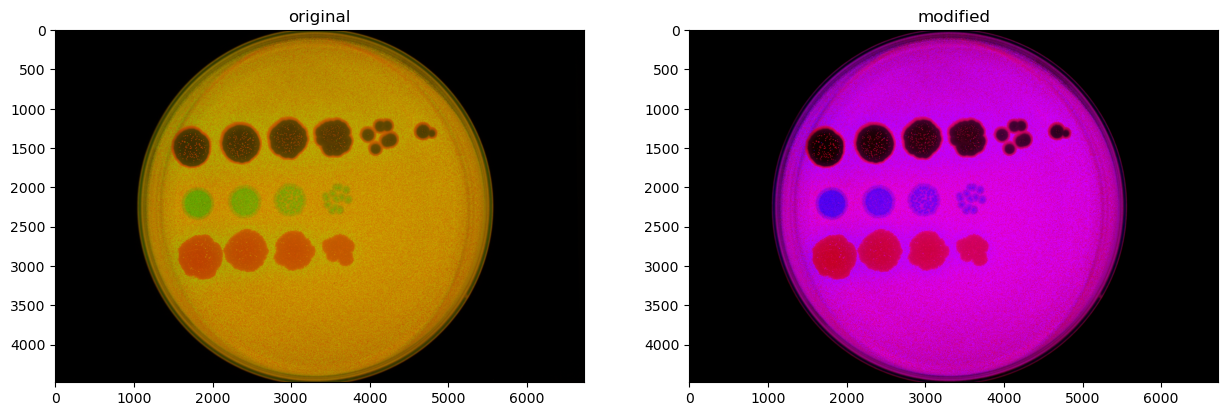

In [14]:
show_both(co_merged.astype(np.uint8), 
          co_adjusted.astype(np.uint8))

## Figure 1c: Co-cultured lawn

### Bright-field

In [15]:
# Read image
full_co_bf = plt.imread('data/raw/20211111_MIX2_BF.jpg')

# adjust with histogram stretching
full_co_bf_adj = exposure.rescale_intensity(full_co_bf,
                                            in_range=(80, 180))

# make grayscale
full_co_bf_adj = color.rgb2gray(full_co_bf_adj)

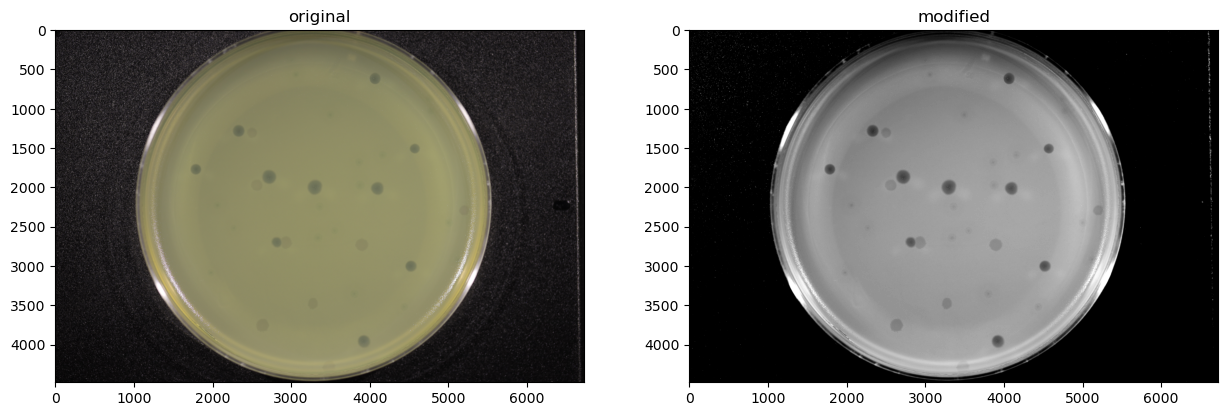

In [16]:
show_both(full_co_bf, full_co_bf_adj, bw=True)

### Red channel

In [17]:
# Read image
full_co_r = plt.imread('data/raw/20211111_MIX2_mCher.jpg')

In [18]:
# Original channel

# make matrix of the right size
red = np.zeros(full_co_r.shape)

# extract RED [0]
red[:,:,0] = full_co_r[:,:,0]

In [19]:
# Adjusted merge

# make matrix of the right size
red_adj = np.zeros(full_co_r.shape)

# adjust RED [0] with histogram stretching
red_adj[:,:,0] = exposure.rescale_intensity(full_co_r[:,:,0],
                                            in_range=(49, 196))

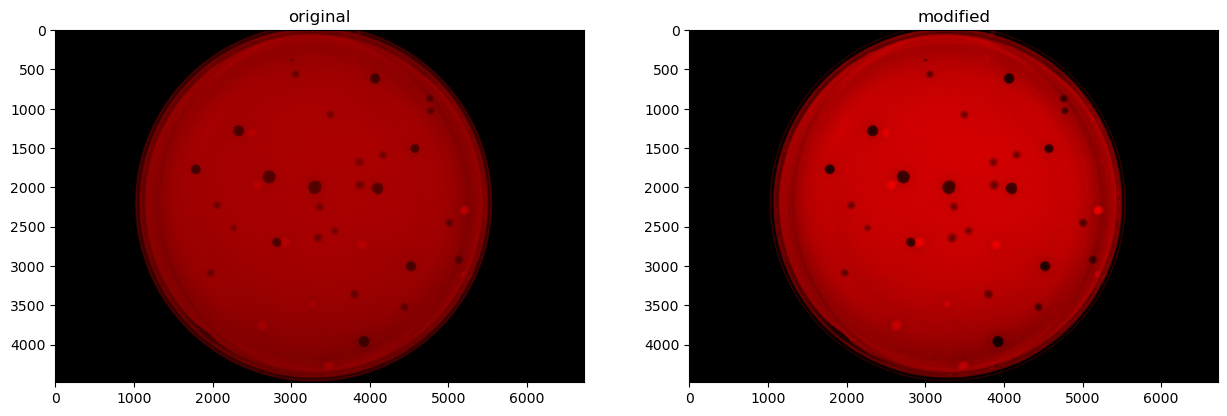

In [20]:
show_both(red.astype(np.uint8), red_adj.astype(np.uint8))

### Green channel

In [21]:
# Read image
full_co_g = plt.imread('data/raw/20211111_MIX2_GFP.jpg')

In [22]:
# Original channel

# make matrix of the right size
green = np.zeros(full_co_g.shape)

# extract GREEN [1]
green[:,:,1] = full_co_g[:,:,1]

In [23]:
# Adjusted merge

# make matrix of the right size
green_adj = np.zeros(full_co_g.shape)

# adjust GREEN [1] channel with histogram stretching, map to BLUE [2]
green_adj[:,:,2] = exposure.rescale_intensity(full_co_g[:,:,1],
                                              in_range=(49, 150))

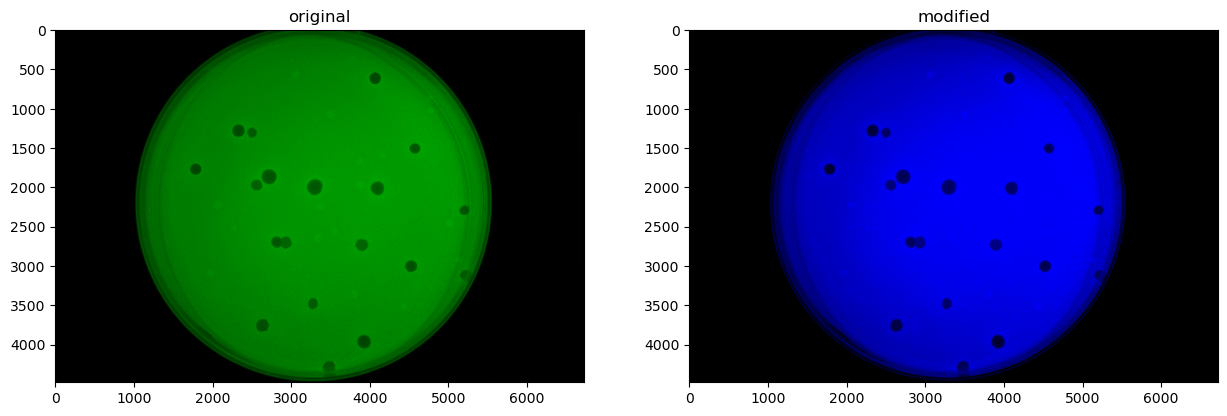

In [24]:
show_both(green.astype(np.uint8), green_adj.astype(np.uint8))

### Merged channels

In [25]:
# Original merge

# make matrix of the right size
rg = np.zeros(full_co_g.shape)

# extract RED [0]
rg[:,:,0] = full_co_r[:,:,0]
# extract GREEN [1], map to BLUE [2]
rg[:,:,2] = full_co_g[:,:,1]

In [26]:
# Adjusted merge

# make matrix of the right size
rg_adj = np.zeros(full_co_g.shape)

# adjust RED [0] channel with histogram stretching
rg_adj[:,:,0] = exposure.rescale_intensity(full_co_r[:,:,0], 
                                           in_range=(49, 228))

# adjust GREEN [1] channel with histogram stretching, map to BLUE [2]
rg_adj[:,:,2] = exposure.rescale_intensity(full_co_g[:,:,1],
                                           in_range=(49, 158))

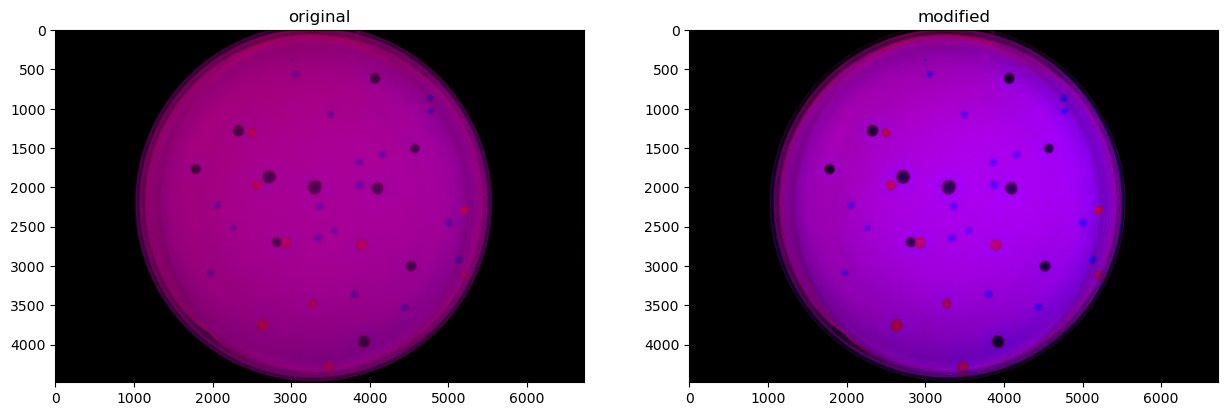

In [27]:
show_both(rg.astype(np.uint8), rg_adj.astype(np.uint8))